In [1]:
# Setup autoreload
%load_ext autoreload
%autoreload 2

# Give yourself access to common
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [6]:
# Gather training and testing data
from common import split_data,add_log_y_values

# nba = get_baseline_data('../data/cleaned_data/base_cleaned.csv')
# X = nba[get_nn_features()].values
# y = nba[['inflationAdjSalary_log']].values

nba = pd.read_csv('./data/cleaned_data/external_cleaned.csv')
nba = add_log_y_values(nba)
nba = nba.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'college','archetype','all_star','all_nba', 'position','team','inflationAdjSalary','salary'])
nba = nba.dropna()
nba = nba.loc[:, (nba != 0).any(axis=0)]
X_train, X_test, y_train, y_test = split_data(nba)

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)


In [7]:
random_forest_model = RandomForestRegressor(n_estimators = 10, random_state = 0)

random_forest_model.fit(X_train, y_train) 

y_pred = random_forest_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2_s=r2_score(y_test, y_pred)
print("MSE: ",mse)
print("r2_socre: ",r2_s)
print("RMSE: ",rmse)
print("MAE:",mae)


MSE:  0.8474410885513741
r2_socre:  0.46348514344164293
RMSE:  0.9205656351132027
MAE: 0.6779594283537643


In [8]:
# plt.scatter(random_forest_model.predict(X_train), random_forest_model.predict(X_train) - y_train.values.reshape((-1,)), c="blue", label="Training Data")
# plt.scatter(random_forest_model.predict(X_test), random_forest_model.predict(X_test) - y_test.values.reshape((-1,)), c="orange", label="Testing Data")
# plt.legend()
# plt.hlines(y=0, xmin=y.min(), xmax=y.max())
# plt.title("Residual Plot for Random forest")
# plt.savefig('RandomForest.png', dpi=256)

<BarContainer object of 32 artists>

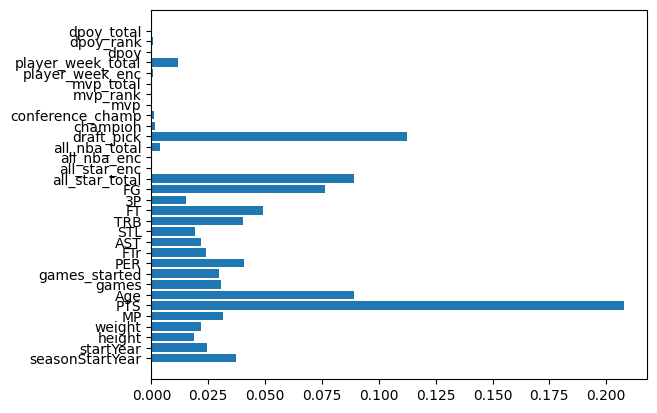

In [9]:
x=['seasonStartYear','startYear','height','weight','MP','PTS','Age','games','games_started','PER','FTr','AST','STL','TRB','FT','3P','FG','all_star_total','all_star_enc','all_nba_enc','all_nba_total','draft_pick','champion','conference_champ','mvp','mvp_rank','mvp_total','player_week_enc','player_week_total','dpoy','dpoy_rank','dpoy_total']
plt.barh(x, random_forest_model.feature_importances_)

In [6]:
# Save Model
import pickle
from common import RF_FILENAME
pickle.dump(random_forest_model, open('saved_models/' + RF_FILENAME, 'wb'))